In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Generate synthetic regression data (non-linear)
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # add noise

In [3]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Fit two models
tree_overfit = DecisionTreeRegressor(max_depth=None, random_state=42)
tree_pruned = DecisionTreeRegressor(max_depth=3, random_state=42)

tree_overfit.fit(X_train, y_train)
tree_pruned.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [5]:
# Predict
X_plot = np.linspace(0, 5, 500).reshape(-1, 1)
y_pred_overfit = tree_overfit.predict(X_plot)
y_pred_pruned = tree_pruned.predict(X_plot)

In [6]:
# Plot results
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

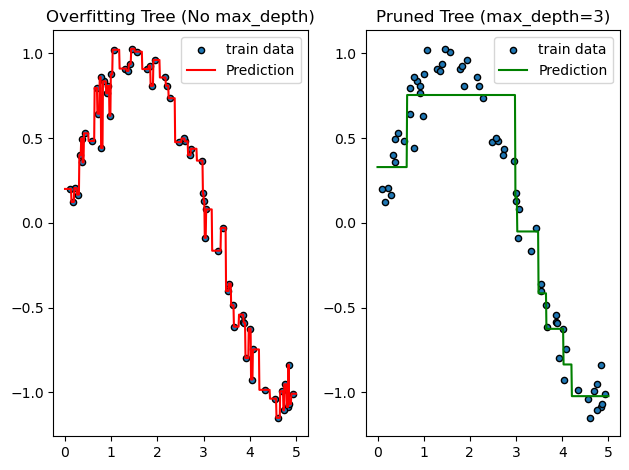

In [10]:
# Overfitting model
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, s=20, edgecolor="k", label="train data")
plt.plot(X_plot, y_pred_overfit, color="red", label="Prediction")
plt.title("Overfitting Tree (No max_depth)")
plt.legend()

# Pruned model
plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, s=20, edgecolor="k", label="train data")
plt.plot(X_plot, y_pred_pruned, color="green", label="Prediction")
plt.title("Pruned Tree (max_depth=3)")
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
# Evaluation
print("Overfit Tree - Train MSE:", mean_squared_error(y_train, tree_overfit.predict(X_train)))
print("Overfit Tree - Test MSE :", mean_squared_error(y_test, tree_overfit.predict(X_test)))
print("Pruned Tree - Train MSE:", mean_squared_error(y_train, tree_pruned.predict(X_train)))
print("Pruned Tree - Test MSE :", mean_squared_error(y_test, tree_pruned.predict(X_test)))

Overfit Tree - Train MSE: 0.0
Overfit Tree - Test MSE : 0.008312803855800893
Pruned Tree - Train MSE: 0.02381777792838034
Pruned Tree - Test MSE : 0.04963432432853545
